# Preprocessing

### Importing Packages

In [8]:
import matplotlib.pyplot as plt
# import tensorflow as tf
# from tf.keras.models import load_model

from utils import load_datasets, get_relevant_columns_from_test_sets, check_accuracy
import test_with_our_model
import test_with_threshold

ModuleNotFoundError: No module named 'tensorflow'

### Defining Global Variables

In [ ]:
TEST_Y_PATH = 'test_y.csv'
MODEL_PATH = 'data/data_type_identifier.h5'

# Load Datasets

In [ ]:
test_datasets = load_datasets()
test_relevant_columns = get_relevant_columns_from_test_sets(test_datasets)

# Testing

### Testing with Threshold

In [33]:
def test_threshold(thresholds):
    threshold_results = {}
    for threshold in thresholds:
        res = test_with_threshold.test_with_threshold(test_datasets, test_relevant_columns, threshold)
        test_accuracy = check_accuracy(res, TEST_Y_PATH)
        threshold_results[f'threshold_{threshold}'] = test_accuracy
    return threshold_results

In [34]:
threshold_results = test_threshold([5, 10, 15, 20])
print(threshold_results)

{'threshold_5': 0.7232142857142857, 'threshold_10': 0.7589285714285714, 'threshold_15': 0.7767857142857143, 'threshold_20': 0.7410714285714286}


In [ ]:
def test_our_model():
    test_list, features_list = test_with_our_model.create_test_list(test_datasets, test_relevant_columns)
#     model = load_model(model_path)
    predictions = test_with_our_model.get_predictions(MODEL_PATH, test_list, features_list)
    test_accuracy = check_accuracy(test_accuracy, TEST_Y_PATH)
    return {'our_model': test_accuracy}

In [ ]:
our_model_results = test_our_model()

### Show Results

results should be a disctionary where the key is the test type and the value is the accuracy gotten in this test. For example, key can be "threshold_5" and the value is 0.7, meaning that for the test with the threshold (of value 5), the accuracy is 0.7

In [28]:
def plot_accuracy_test(results):
    for test_type in results.keys():
        plt.bar(test_type, results[test_type])
    plt.show()

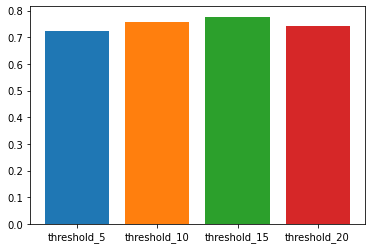

In [29]:
plot_accuracy_test(results)